In [109]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
with open('dataset.json') as jsonfile:
    data = json.load(jsonfile)


In [111]:
data[0]

{'browser': 'Firefox',
 'os': 'Ubuntu',
 'locale': 'ru_RU',
 'user_id': 105,
 'gender': 'm',
 'location': 'USA/Chicago',
 'sites': [{'site': 'mail.google.com', 'length': 50},
  {'site': 'toptal.com', 'length': 132},
  {'site': 'slack.com', 'length': 65},
  {'site': 'lenta.ru', 'length': 59},
  {'site': 'youtube.com', 'length': 67},
  {'site': 'chitay-knigi.ru', 'length': 108}],
 'time': '09:03:00',
 'date': '2017-01-08'}

In [129]:
sites = []
for dat in data:
    for site in dat['sites']:
        sites.append(site['site'])


In [130]:
sites_df = pd.DataFrame({'Sites':sites})
print("There are",len(sites_df.Sites.unique()),"unique web sites in the data set")


There are 11131 unique web sites in the data set


In [157]:
df = pd.DataFrame.from_dict(data)

In [158]:
df.isnull().sum()

browser     0
os          0
locale      0
user_id     0
gender      0
location    0
sites       0
time        0
date        0
dtype: int64

In [159]:
df['dtime'] = pd.to_datetime(df.apply(lambda x: x['date']+' '+x['time'],axis=1))
df.dtypes

browser             object
os                  object
locale              object
user_id              int64
gender              object
location            object
sites               object
time                object
date                object
dtime       datetime64[ns]
dtype: object

In [160]:
df.sort_values('dtime',inplace=True)
df.head()

,browser,os,locale,user_id,gender,location,sites,time,date,dtime
53977,Chrome,Windows 10,de-DE,127,m,New Zealand/Auckland,"[{'site': 'mail.google.com', 'length': 44}, {'...",17:12:00,2016-01-14,2016-01-14 17:12:00
46592,Chrome,Windows 10,en-CA,130,m,New Zealand/Auckland,"[{'site': 'booking.com', 'length': 143}, {'sit...",17:22:00,2016-01-14,2016-01-14 17:22:00
55725,Firefox,Windows 8,en-GB,167,f,China/Shanghai,"[{'site': 'toptal.com', 'length': 174}, {'site...",18:15:00,2016-01-14,2016-01-14 18:15:00
33047,Safari,MacOS,pt-BR,64,m,New Zealand/Auckland,"[{'site': 'geotrust.com', 'length': 56}, {'sit...",18:53:00,2016-01-14,2016-01-14 18:53:00
48677,Chrome,Windows 7,ur-PK,55,f,Australia/Sydney,"[{'site': 'youtube.com', 'length': 226}, {'sit...",19:34:00,2016-01-14,2016-01-14 19:34:00


In [266]:
print("Joe has only connected from locations:",list(df.loc[df.user_id==0].location.unique()))
print("Joe only uses browser:",list(df.loc[df.user_id==0].browser.unique()))
print("Joe only uses OS:",list(df.loc[df.user_id==0].os.unique()))

Joe has only connected from locations: ['France/Paris', 'USA/Chicago', 'Canada/Toronto']
Joe only uses browser: ['Firefox', 'Chrome']
Joe only uses OS: ['Windows 10', 'Ubuntu']


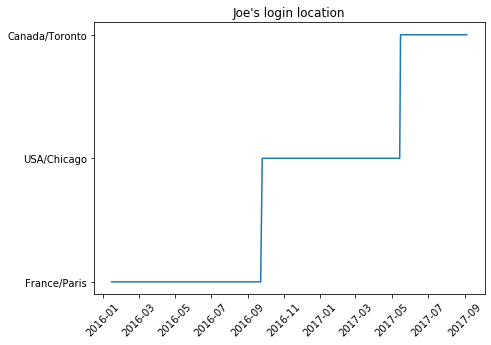

In [267]:
plt.figure(figsize=(7,5))
plt.plot(df.loc[df.user_id==0].dtime.values,df.loc[df.user_id==0].location.values)
plt.xticks(rotation=45)
plt.title("Joe's login location")
plt.show()

In [268]:
def get_joe_count(column):
    count = df[column].value_counts().mul(0) + df.loc[df.user_id==0][column].value_counts()
    order_ind = df[column].value_counts().mul(0).index.values
    return count.loc[order_ind]

def plot(column):
    
    width=0.4
    tot_joe = df.loc[df.user_id==0][column].value_counts().sum(axis=0)
    tot = df[column].value_counts().sum(axis=0)    
    
    fig,ax = plt.subplots(figsize=(10,6))
    get_joe_count(column).div(tot_joe).mul(100).plot(
        kind='bar',color='red',label='Joe',ax=ax,position=0,width=width)
    df[column].value_counts().div(tot).mul(100).plot(
        kind='bar',color='blue',label='All',ax=ax,position=1,width=width)
    ax.set_ylabel("%")
    ax.legend()
    plt.tight_layout()
    plt.xticks(rotation=80)
    plt.show()    

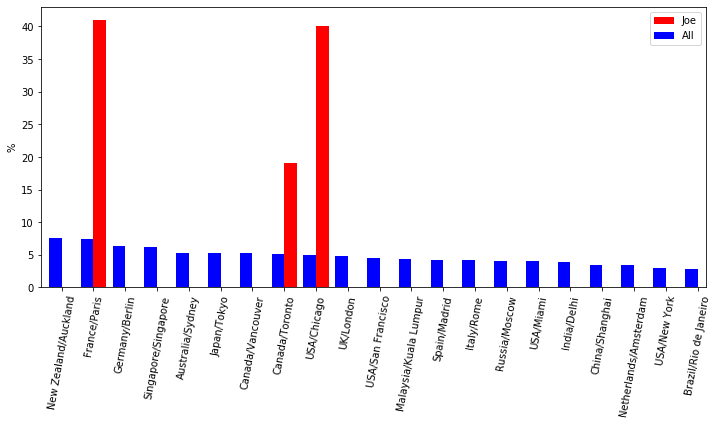

In [269]:
plot('location')

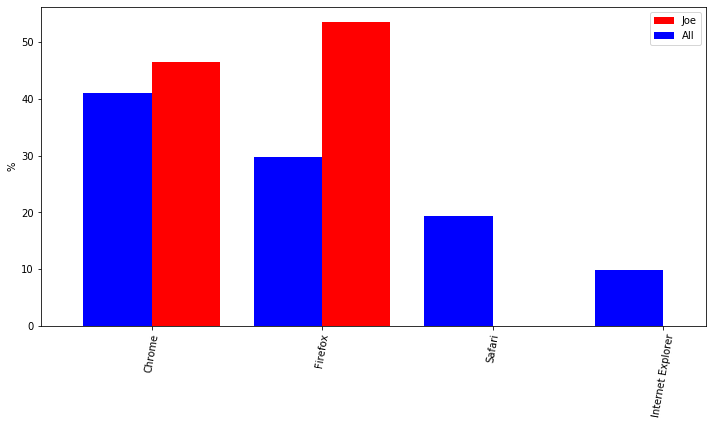

In [270]:
plot('browser')

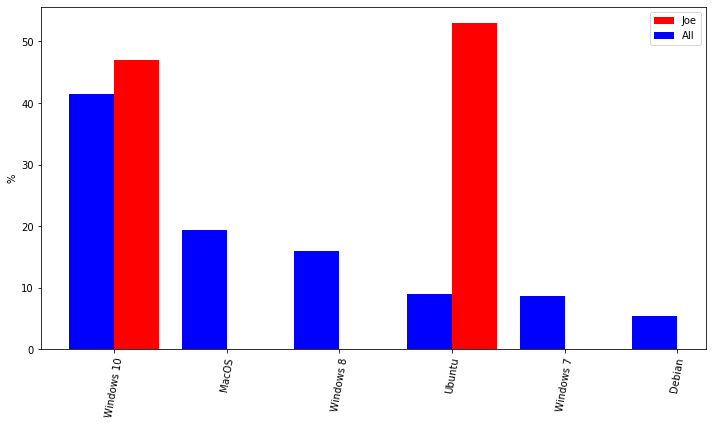

In [271]:
plot('os')

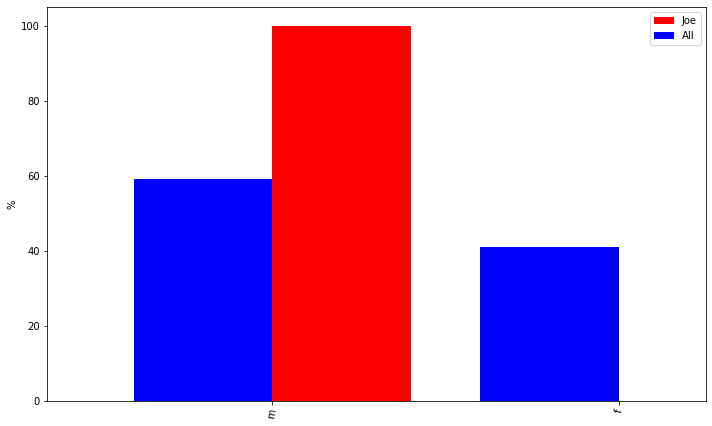

In [272]:
plot('gender')

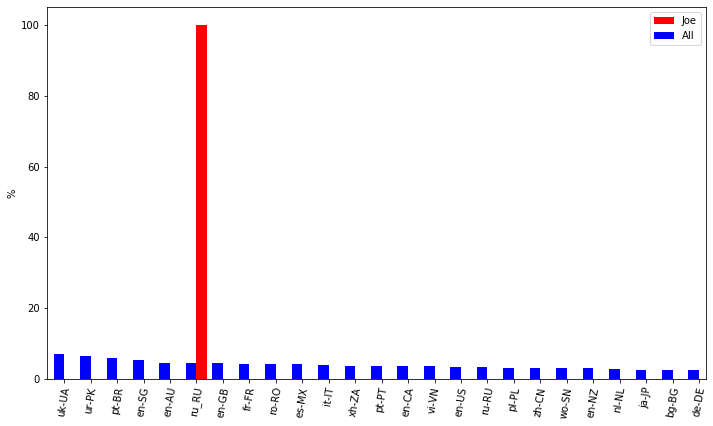

In [273]:
plot('locale')

In [84]:
df_dummies = pd.get_dummies(df,columns=['browser','os','locale','gender','location'])
df_dummies.head()

,user_id,sites,time,date,datetime,browser_Chrome,browser_Firefox,browser_Internet Explorer,browser_Safari,os_Debian,...,location_Netherlands/Amsterdam,location_New Zealand/Auckland,location_Russia/Moscow,location_Singapore/Singapore,location_Spain/Madrid,location_UK/London,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco
0,105,"[{'site': 'mail.google.com', 'length': 50}, {'...",09:03:00,2017-01-08,2017-01-08 09:03:00,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,11,"[{'site': 'meduza.org', 'length': 40}, {'site'...",13:57:00,2016-10-05,2016-10-05 13:57:00,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,17,"[{'site': 'facebook.net', 'length': 74}, {'sit...",02:06:00,2017-03-28,2017-03-28 02:06:00,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,134,"[{'site': 'verisign.com', 'length': 111}, {'si...",21:49:00,2017-06-25,2017-06-25 21:49:00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,92,"[{'site': 'live.com', 'length': 79}, {'site': ...",00:05:00,2016-02-10,2016-02-10 00:05:00,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
